# Lab 02: Simple Linear Regression

## Build Hypothesis and Cost

*   Hypothesis: $H(x) = Wx + b$

*   Cost: $cost(W) = \frac{1}{m}∑_{i=1}^{m}(Wx_i - y_i)^2 $

*  cost(W, b)를 최소화하는 (W, b)를 구하기


In [1]:
# Hypothesis
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [2]:
# Cost
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [3]:
# reduce_mean() & square()
v = [1., 2., 3., 4.]

tf.reduce_mean(v), tf.square(3) #2.5, 9

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=9>)

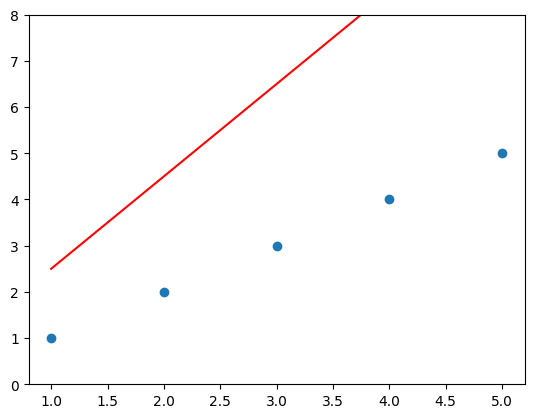

In [21]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b
W.numpy(), b.numpy()

hypothesis.numpy()

plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

In [22]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0.0, 8.0)

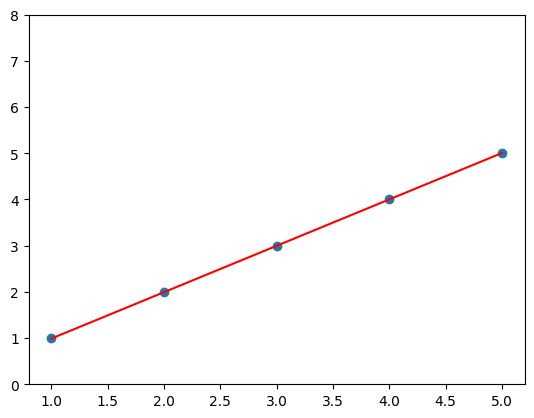

In [25]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

## Gradient Descent

*   경사하강법: cost를 minimize 하게 하는 W와 b를 찾는 알고리즘

*   실행되는 연산들은 tape에 기록되며, gradient() method를 호출해 미분값을 구한다.

In [4]:
# learning_rate initialize
learning_rate = 0.01

In [5]:
# Gradient Descent
import tensorflow as tf

with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])

# A.assign_sub(B) => A = A - B
W.assign_sub(learning_rate * W_grad), b.assign_sub(learning_rate * b_grad)

(<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.4520001>,
 <tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>)

In [6]:
# Parameter(W, b) Update
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100): # W와 b를 여러 번 업데이트 하기 위해 for문을 사용
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  W_grad, b_grad = tape.gradient(cost, [W, b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 10 == 0: # W, b, cost가 어떻게 변하는지 확인하기 위한 코드
    print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0048001>
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-0.01732975>


(0.0, 8.0)

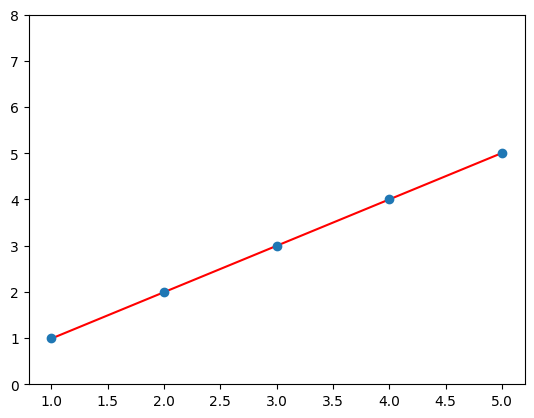

In [26]:
learning_rate = 0.01

print(W.assign_sub(learning_rate * W_grad))
print(b.assign_sub(learning_rate * b_grad))

W.numpy(), b.numpy()

plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

In [7]:
# Full Code
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100):
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

  W_grad, b_grad = tape.gradient(cost, [W, b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 10 == 0:
    print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


In [8]:
# Predict
print(W * 5 + b)
print(W *2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


# Lab 03: Linear Regression

## Simplified Hypothesis and Cost

*   Hypothesis: $H(x) = Wx $

*   Cost: $cost(W) = \frac{1}{m}∑_{i=1}^{m}(Wx_i - y_i)^2 $

In [9]:
# Cost function in pure Python
import numpy as np

X = np.array([1, 2, 3]) # X = [1, 2, 3]
Y = np.array([1, 2, 3]) # Y = [1, 2, 3]

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X)

for feed_W in np.linspace(-3, 5, num = 15):
  curr_cost = cost_func(feed_W, X, Y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [10]:
# Cost function in TensorFlow 1
import tensorflow as tf
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis-Y))

W_values = np.linspace(-3, 5, num = 15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [11]:
# Cost 계산 1
W = 0
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 1
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 2
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 3
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

4.666666666666667
0.0
4.666666666666667
18.666666666666668


In [12]:
# Cost 계산 2
data = [
    (1, 1),
    (2, 2),
    (3, 3),
]

def cost_func(w, data):
    s = 0
    m = len(data)
    for v in data:
        s += (w*v[0] - v[1]) ** 2
    return s/m
print( cost_func(0, data) )
print( cost_func(1, data) )
print( cost_func(2, data) )
print( cost_func(3, data) )

4.666666666666667
0.0
4.666666666666667
18.666666666666668


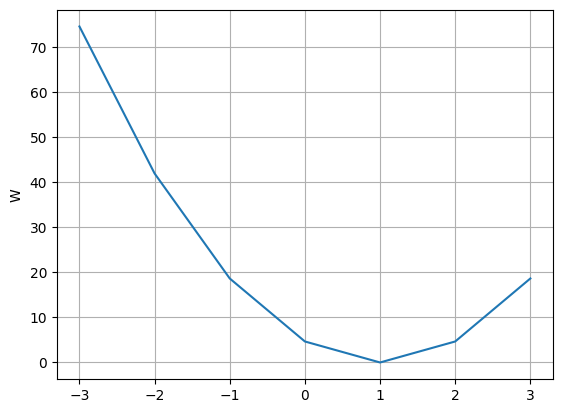

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

w_vals = range(-3, 4)
cost_vals = [cost_func(w, data) for w in w_vals]

plt.plot(w_vals, cost_vals)
plt.ylabel('cost')
plt.ylabel('W')
plt.grid()

## Gradient Descent

*   $cost(W) = \frac{1}{m}∑_{i=1}^{m}(Wx_i - y_i)^2 $


*   $W := W - \boldsymbol{\alpha}\frac{1}{m}∑_{i=1}^{m}(Wx_i - y_i)x_i $

In [ ]:
# Gradient Descent
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
descent = W- tf.multiply(alpha, gradient)
W.assign(descent)

In [15]:
# Full code
import tensorflow as tf
tf.random.set_seed(0) # for reproducibility

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W- tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [16]:
# Output when W = 5
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W- tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


# Lab 04: Multi-variable Linear Regression



## $H(x_1, x_2, x_3) = w_1x_1 + w_2x_2 + w_3x_3$



In [ ]:
# Data and Label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]

In [ ]:
# Weights
w1 = tf.Variable(10.)
w2 = tf.Variable(10.)
w3 = tf.Variable(10.)
b = tf.Variable(10.)

In [ ]:
# Hypothesis
hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b

In [17]:
# Full Code
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]

w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000 + 1):
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   11325.9121
   50 |     135.3618
  100 |      11.1817
  150 |       9.7940
  200 |       9.7687
  250 |       9.7587
  300 |       9.7489
  350 |       9.7389
  400 |       9.7292
  450 |       9.7194
  500 |       9.7096
  550 |       9.6999
  600 |       9.6903
  650 |       9.6806
  700 |       9.6709
  750 |       9.6612
  800 |       9.6517
  850 |       9.6421
  900 |       9.6325
  950 |       9.6229
 1000 |       9.6134


## $H(X) = XW$ (Matrix)

In [18]:
# Full Code
data = np.array([
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.]
], dtype=np.float32)

#slicing data
x = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

# hypothesis
def predict(X):
  return tf.matmul(X, W) + b

n_epochs = 2000
for i in range(n_epochs+1):
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(x) - y)))

  W_grad, b_grad = tape.gradient(cost, [W, b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

    0 |  5455.5903
  100 |    31.7443
  200 |    30.9326
  300 |    30.7894
  400 |    30.6468
  500 |    30.5055
  600 |    30.3644
  700 |    30.2242
  800 |    30.0849
  900 |    29.9463
 1000 |    29.8081
 1100 |    29.6710
 1200 |    29.5348
 1300 |    29.3989
 1400 |    29.2641
 1500 |    29.1299
 1600 |    28.9961
 1700 |    28.8634
 1800 |    28.7313
 1900 |    28.5997
 2000 |    28.4689


## Hypothesis without b

In [30]:
import tensorflow as tf

x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform((1, 3), -1.0, 1.0))

learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))


    0 |  24.558537 |    -0.4073 |    -0.5632 |     0.0792
   50 |   5.844981 |    -0.0944 |     0.2559 |     0.4061
  100 |   1.479299 |     0.0616 |     0.6323 |     0.6030
  150 |   0.411800 |     0.1401 |     0.8041 |     0.7236
  200 |   0.131314 |     0.1798 |     0.8819 |     0.7989
  250 |   0.050191 |     0.1997 |     0.9167 |     0.8464
  300 |   0.024038 |     0.2091 |     0.9321 |     0.8768
  350 |   0.014667 |     0.2131 |     0.9389 |     0.8966
  400 |   0.010968 |     0.2140 |     0.9420 |     0.9096
  450 |   0.009352 |     0.2132 |     0.9436 |     0.9183
  500 |   0.008548 |     0.2115 |     0.9445 |     0.9242
  550 |   0.008075 |     0.2092 |     0.9452 |     0.9284
  600 |   0.007743 |     0.2066 |     0.9459 |     0.9315
  650 |   0.007473 |     0.2038 |     0.9466 |     0.9338
  700 |   0.007233 |     0.2010 |     0.9473 |     0.9356
  750 |   0.007009 |     0.1981 |     0.9480 |     0.9371
  800 |   0.006795 |     0.1952 |     0.9488 |     0.9384
  850 |   0.00

In [31]:
# Multi-variable linear regression (1)

X = tf.constant([[1., 2.],
                 [3., 4.]])
y = tf.constant([[1.5], [3.5]])

W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal((1,)))

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

n_epoch = 1000+1
print("epoch | cost")
for i in range(n_epoch):
    # Use tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(y_pred - y))

    # calculates the gradients of the loss
    grads = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if i % 50 == 0:
        print("{:5} | {:10.6f}".format(i, cost.numpy()))


epoch | cost
    0 |   2.586026
   50 |   0.422365
  100 |   0.288775
  150 |   0.197438
  200 |   0.134990
  250 |   0.092294
  300 |   0.063102
  350 |   0.043144
  400 |   0.029498
  450 |   0.020168
  500 |   0.013789
  550 |   0.009428
  600 |   0.006446
  650 |   0.004407
  700 |   0.003013
  750 |   0.002060
  800 |   0.001409
  850 |   0.000963
  900 |   0.000658
  950 |   0.000450
 1000 |   0.000308


# Lab 05: Logistic Regression/Classification

<function matplotlib.pyplot.show(close=None, block=None)>

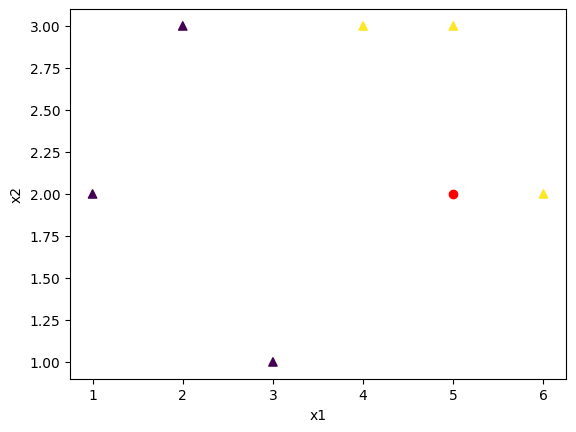

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = [[1., 2], [2., 3], [3., 1], [4., 3], [5., 3], [6., 2]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c =  colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

W = tf.Variable(tf.zeros([2, 1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

def logistic_regression(features):
  hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b))
  return hypothesis

def loss_fn(hypothesis, labels):
  cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

def grad(features, labels):
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W,b])

EPOCHS = 1001
for step in range(EPOCHS):
  for features, labels, in iter(dataset.batch(len(x_train))):
    hypothesis = logistic_regression(features)
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
    if step % 100 == 0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels)))

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000
